https://colab.research.google.com/github/bclevine/WISE-2023/blob/main/WISE_HR_notebook.ipynb

In [1]:
!wget https://github.com/bclevine/WISE-2023/raw/main/wise_helper_functions.py
!wget https://github.com/bclevine/WISE-2023/raw/main/pleiades.csv
!wget https://github.com/bclevine/WISE-2023/raw/main/praesepe.csv
!wget https://github.com/bclevine/WISE-2023/raw/main/wcen.csv
!wget https://github.com/bclevine/WISE-2023/raw/main/Gaia_iso.csv
from wise_helper_functions import *

# Isochrones and Star Clusters

Star populations lie along certain curves in color-brightness space. The shape of the curve is determined by the **age** and the **metallicity** of the star. By **metallicity**, we simply mean "does the star have a lot of heavy elements in it (heavier than Hydrogen)?"

Astronomers call these curves **isochrones**, which comes from the Greek roots "iso" (meaning "equal") and "chrone" (meaning "time"). All the stars that lie on a single isochrone were born at an equal time.

Astronomers have computed theoretical isochrones based on models of stellar evolution. Let's take a look at some now.

In [2]:
# We will read in a set of isochrone models...
iso = pd.read_csv('Gaia_iso.csv')

In [3]:
print('Possible values for age:')
print(*np.linspace(5, 10.25, 22), sep=', ')
print('\nPossible values for metallicity:')
print(*np.concatenate([np.linspace(-4, -2, 5), np.linspace(-1.75, 0.5, 10)]), sep=', ')

Possible values for age:
5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25

Possible values for metallicity:
-4.0, -3.5, -3.0, -2.5, -2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5


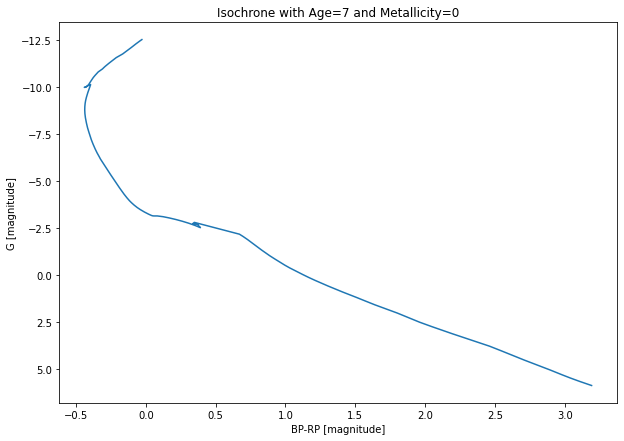

In [4]:
# ...and now let's plot one of the isochrones.

# You can play with the values of AGE and METALLICITY below to see how they change the shape of the curve.
# Note that both are in exponential/scientific units. E.g., Age=7 means 10^7 years old.
AGE = 7
METALLICITY = 0

g, bp, rp, b, v, r = get_isochrone(AGE, METALLICITY, 1*u.pc)
plt.figure(figsize=(10, 7))
plt.title(f'Isochrone with Age={AGE} and Metallicity={METALLICITY}')
plt.xlabel('BP-RP [magnitude]')
plt.ylabel('G [magnitude]')
plt.gca().invert_yaxis()
plt.plot(bp-rp, g)

The x-axis is the color of the star. The y-axis is the brightness of the star in a certain color (here, the color is "G". Astronomers use special names for collors, usually one or two letters). The plot is telling us that all stars born together at the given age and metallicity will lie somewhere along that curve. 

Notice that the y-axis is inverted (it has negative numbers on the top, and positive numbers on the bottom). That's because astronomers have a strange unit for brightness called "magnitude." The smaller the magnitude of a star, the brighter it is. So, the brightest stars on this graph are near the top, and the dimmest are near the bottom.

The reddest stars will be near the right, and the bluest stars will be near the left.

Let's take a look at how isochrones evolve with age:

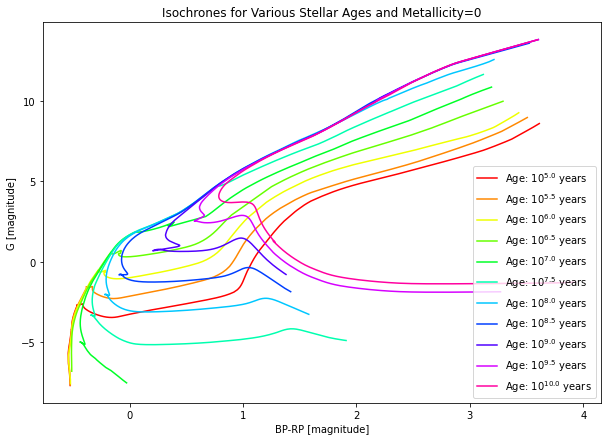

In [5]:
fig,ax = plt.subplots(figsize=(10, 7))
cm = plt.get_cmap('hsv')
ax.set_prop_cycle(color=[cm(1.*i/11) for i in range(11)])
plt.title('Isochrones for Various Stellar Ages and Metallicity=0')
plt.xlabel('BP-RP [magnitude]')
plt.ylabel('G [magnitude]')
for age in np.linspace(5, 10, 11):
    ax.plot(iso[f"BP_{age:.2f}_p0.00"]-iso[f"RP_{age:.2f}_p0.00"], iso[f"G_{age:.2f}_p0.00"], label=r'Age: $10^{{{}}}$ years'.format(age))
    ax.legend()

What happens to the stars as they get older? Do they get brighter or dimmer? Redder or bluer?

### Star Clusters

Imagine that we have a cluster of stars all born together. The stars should have the same age and the same metallicity. That means, if we see a star cluster in the sky, we can determine its age and metallicity by fitting it to an isochrone. Let's give that a try now.

First, we'll take a look at the Pleiades, which is a young group of nearby stars. You can already see in the image below that they have similar colors, which is a clue that they might be a similar age.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Pleiades_large.jpg/2560px-Pleiades_large.jpg)

In [6]:
# Load in our data and take a look at it:
pleiades = pd.read_csv('pleiades.csv')
pleiades

,BP-RP,G,ra,dec
0,0.660386,9.7295,53.882158,22.823390
1,3.096090,17.2698,54.046203,23.806264
2,1.722190,13.5183,54.101510,22.623601
3,3.120390,17.5594,54.160077,23.145484
4,2.747290,15.8874,54.485193,23.382239
...,...,...,...,...
325,3.108490,17.2830,59.642484,22.669624
326,1.859890,13.7666,59.845480,22.571176
327,1.497690,12.8440,59.864777,23.123594
328,2.825690,16.1267,60.358618,21.585603


We have four columns: 
- BP-RP is the color of the star
- G is the brightness of the star in "G" color
- ra is the "right ascension" of the star, one coordinate of its position on the sky
- dec is the "declination" of the star, the other coordinate of its position on the sky
It looks like there are 330 stars in this cluster.

We can plot their positions below:

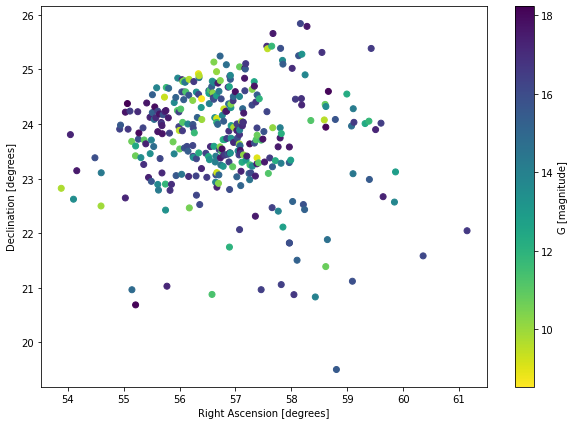

In [7]:
plot_positions(pleiades)

And we can plot their Color-Magnitude Diagram below. See if you can adjust the age and metallicity so that the isochrone fits the data. It might not be exactly perfect — real data rarely is!

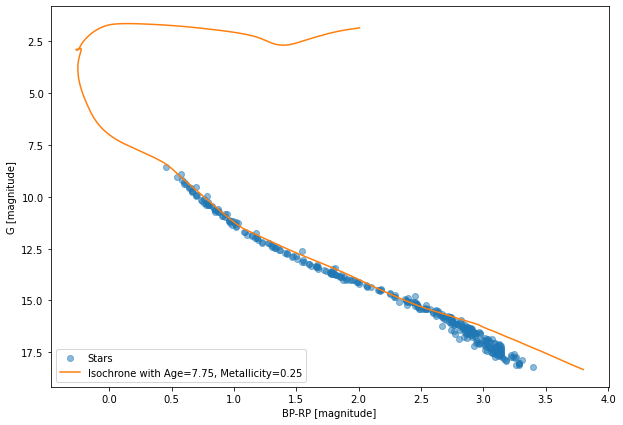

In [8]:
AGE = 7.75
METALLICITY = .25

g, bp, rp, b, v, r = get_isochrone(AGE, METALLICITY, 444.2*u.lightyear) # <- here, I put in the distance to the Pleiades for you...
plot_CMD(pleiades)
plt.plot(bp-rp, g, color='C1', label=f'Isochrone with Age={AGE}, Metallicity={METALLICITY}')
plt.legend()

In [9]:
# Load in our data:
praesepe = pd.read_csv('praesepe.csv')

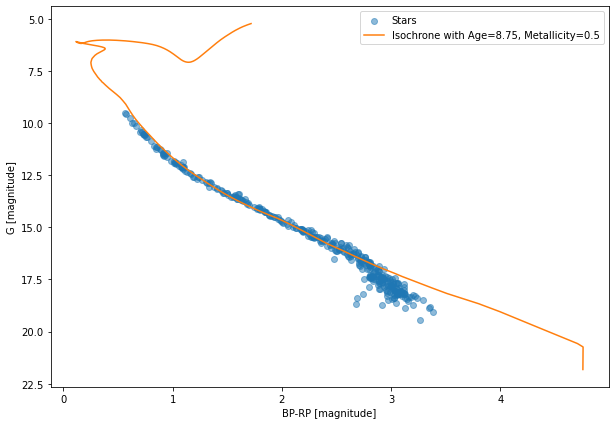

In [10]:
AGE = 8.75
METALLICITY = .5

g, bp, rp, b, v, r = get_isochrone(AGE, METALLICITY, 610*u.lightyear) # <- here, I put in the distance to the Praesepe Cluster for you...
plot_CMD(praesepe)

plt.plot(bp-rp, g, color='C1', label=f'Isochrone with Age={AGE}, Metallicity={METALLICITY}')
plt.legend()

What was your best-fit age for the Pleiades? What about for the Beehive Cluster?

Which one is older? About how many times older? (Remember that age is given in exponential/scientific units. For example, Age=7 means $10^7$ years old.)

Now let's take a look at something called a Globular Cluster. This particular cluster of stars is called Omega Centauri. By fitting an isochrone to it, see if you can figure out what's special about Globular Clusters.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Omega_Centauri_by_ESO.jpg/2560px-Omega_Centauri_by_ESO.jpg)

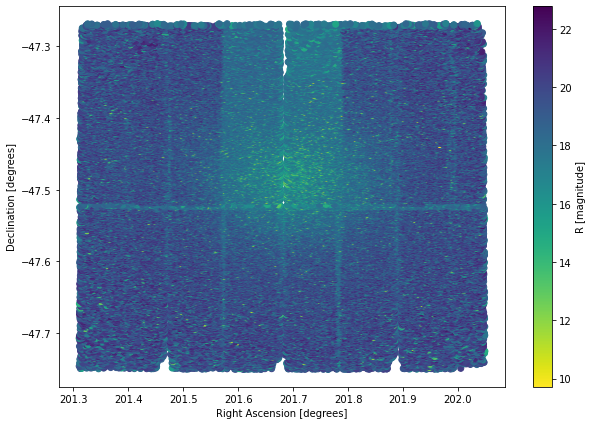

In [11]:
# Load in our data:
# Note that here we are abbreviating the cluster to "wcen" where 'w' is the Greek letter Omega and 'cen' stands for Centauri.
wcen = pd.read_csv('wcen.csv')
plot_positions(wcen)

Look how many stars we have compared to the Pleiades and the Beehive Cluster! The chart is completely filled up.

Now, try to fit an isochrone to Omega Centauri. Notice here that we're using different colors and brightnesses (B-V and R) because this data was taken with a different telescope. But it won't make a difference for what you have to do.

(22.5, 8.0)

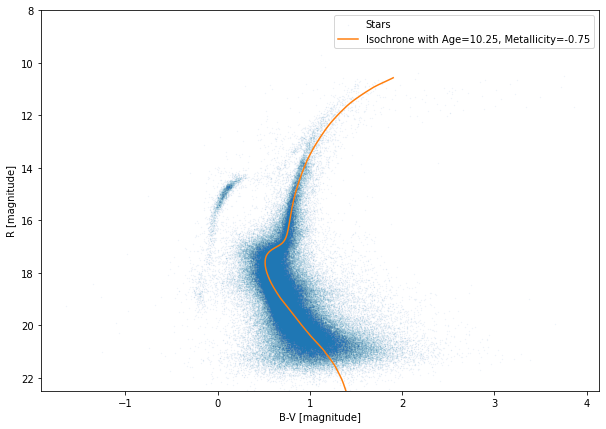

In [19]:
AGE = 10.25
METALLICITY = -.75

g, bp, rp, b, v, r = get_isochrone(AGE, METALLICITY, 4.84*u.kpc) # <- here, I put in the distance to Omega Centauri for you...
plot_CMD(wcen, opacity=.1, s=.1)

plt.plot(b-v, r, color='C1', label=f'Isochrone with Age={AGE}, Metallicity={METALLICITY}')
plt.legend(loc='upper right')
plt.ylim(22.5, 8)

How old do you think Omega Centauri is? How many times older is it than the Pleiades?